In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data Generation
===

In [4]:
from numpy.random import rand, randn

In [7]:
n, d, k = 100, 2, 2

In [26]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S]*k # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([0.69872366, 0.75176984]), array([0.25997411, 0.14504062])]
[array([[0.01764816, 0.        ],
       [0.        , 0.06360523]]), array([[0.01764816, 0.        ],
       [0.        , 0.06360523]])]


Solution
===

In [61]:
m = np.diag([1,2])
x = np.array([
    [1,1],
    [2,2],
    [3,3],
    [4,4],
])
print(m.shape, x.shape)
y = m @ (x.T)
print(y, y.shape)
(x * y.T).sum(axis=1)

(2, 2) (4, 2)
[[1 2 3 4]
 [2 4 6 8]] (2, 4)


array([1.73205081, 3.46410162, 5.19615242, 6.92820323])

In [83]:
def compute_log_p(X, mean, sigma):
    ''' fill your code in here...
    '''
    d = X.shape[1]
    exp = ((X-mean)*(np.linalg.inv(sigma) @ (X-mean).T).T).sum(axis=1)
    return -1/2 * (d * np.log(2*np.pi) + np.log(np.linalg.det(sigma)) + exp )

In [84]:
log_ps = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)]  # exercise: try to do this without looping
print(log_ps[0])

[ 1.04426134e+00  4.72734251e-01 -1.09175411e+01 -1.77142634e+00
 -9.35806711e-01 -3.60176551e+00  1.28061352e+00 -2.62760104e+00
 -8.03935487e+00 -6.36531288e+00  5.34637309e-01 -1.55472052e+00
  8.84354599e-01  1.36874142e+00 -5.48823372e-01  1.46748317e+00
 -7.36114714e+00  8.31979343e-01 -2.76732434e+00 -5.33576755e+00
  1.11503962e+00 -3.53742991e+00 -4.17139257e+00 -6.80017057e+00
 -1.68598922e+00  5.96835706e-01  1.35563404e+00  1.14211261e+00
  1.43800790e+00 -1.00068955e+00 -3.56171609e+00  1.42011317e+00
  7.09102377e-01 -2.98585392e+00 -2.51263285e+00  1.13714126e+00
  3.81785428e-01 -2.01024310e+00  6.58834328e-01 -3.85385939e+00
 -1.04576270e+01 -5.66308795e+00 -4.94925000e+00 -1.48244258e+00
 -1.15087926e+01  1.40713991e+00 -1.40257318e+01  7.03600678e-02
 -1.13543592e-01  5.49467030e-01  4.79865214e-02 -2.62543903e+00
 -1.12198063e+00 -2.56871821e+00 -1.54904349e+00 -9.61129957e-01
 -4.08181956e-01 -3.42872244e+00 -1.02466539e-02 -9.12897776e+00
 -5.28571144e+00 -5.12716

In [85]:
def compute_log_ps(X, means, sigmas):
    pass

In [86]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

[0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0
 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1
 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0]


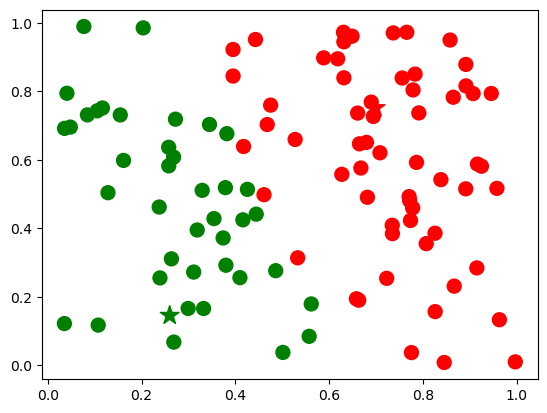

In [87]:
colors = np.array(['red', 'green'])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200, c=['red', 'green'])
plt.show()